In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
customers = pd.read_csv('C:/Users/User/Desktop/case/png_magnit_customers.csv', sep=',')
customers

,customer,customer_age_group,gender,enr_channel,enr_date
0,e0efeacbbbbc72f53a0c,[21 - 25],F,SMS,2019-10-27
1,3211c12941b73356a68e,[36 - 40],F,Mobile App,2019-11-02
2,4c2c6c4175dc9a75e134,[51 and more],U,Mobile App,2019-11-01
3,2698e403385bf0e02553,[31 - 35],F,Mobile App,2019-10-25
4,5580c83260e4a918965e,[26 - 30],F,SMS,2019-10-27
...,...,...,...,...,...
352542,c3300c0dbd7575a5ad87,[41 - 45],F,Customer Web Portal,2019-11-02
352543,3cacc97ad8e40901c267,[36 - 40],M,Mobile App,2020-06-06
352544,e68971c243be971b0f6f,[46 - 50],F,Mobile App,2019-11-02
352545,b7f72643a02f0509ecc7,[46 - 50],F,SMS,2019-11-29


In [42]:
sales = pd.read_csv('C:/Users/User/Desktop/case/png_magnit_purchases.csv', sep=',')
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,NaN,2.0,NaN
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,NaN,3.0,NaN
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,NaN,3.0,NaN
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,NaN,3.0,NaN
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,NaN,2.0,NaN
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,NaN,4.0,NaN
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,NaN,4.0,NaN
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,NaN,3.0,NaN


In [43]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441625 entries, 0 to 14441624
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   purchase date    object 
 1   customer         object 
 2   product          object 
 3   other_product    float64
 4   p&g_product      float64
 5   cost_product     float64
 6   cost_p&g         float64
 7   product_segment  float64
 8   p&g_segment      float64
dtypes: float64(6), object(3)
memory usage: 991.6+ MB


In [44]:
len(sales['product'].unique())

393

In [46]:
sales['product'] = sales['product'].astype('category')

In [47]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441625 entries, 0 to 14441624
Data columns (total 9 columns):
 #   Column           Dtype   
---  ------           -----   
 0   purchase date    object  
 1   customer         object  
 2   product          category
 3   other_product    float64 
 4   p&g_product      float64 
 5   cost_product     float64 
 6   cost_p&g         float64 
 7   product_segment  float64 
 8   p&g_segment      float64 
dtypes: category(1), float64(6), object(2)
memory usage: 909.0+ MB


In [48]:
sales.describe()

,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
count,1.444162e+07,1.444162e+07,1.317359e+07,1.367972e+06,1.317359e+07,1.367972e+06
mean,1.100367e+00,1.003803e-01,6.258492e-16,-4.000803e-16,2.931348e+00,2.407568e+00
std,6.960031e-01,3.205961e-01,9.999992e-01,1.000000e+00,6.471386e-01,4.913823e-01
min,0.000000e+00,0.000000e+00,-5.531371e+00,-3.987413e+00,1.000000e+00,2.000000e+00
25%,1.000000e+00,0.000000e+00,-6.347085e-01,-5.928767e-01,3.000000e+00,2.000000e+00
50%,1.000000e+00,0.000000e+00,-2.192748e-01,-2.441679e-01,3.000000e+00,2.000000e+00
75%,1.000000e+00,0.000000e+00,4.043952e-01,3.893598e-01,3.000000e+00,3.000000e+00
max,3.800000e+01,1.100000e+01,1.189054e+02,8.689989e+01,4.000000e+00,3.000000e+00


<AxesSubplot:>

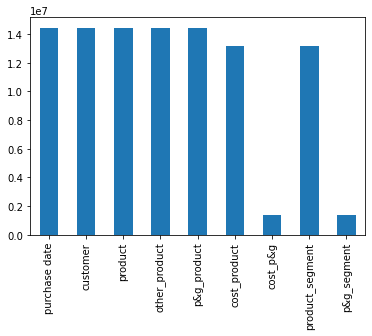

In [49]:
sales.count().plot.bar()

In [50]:
sales.count()

purchase date      14441625
customer           14441625
product            14441625
other_product      14441625
p&g_product        14441625
cost_product       13173586
cost_p&g            1367972
product_segment    13173586
p&g_segment         1367972
dtype: int64